**Minor Project**

**Import Libraries and Dataset**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Dataset
data=pd.read_csv('/content/drive/MyDrive/dataset/diabetes.csv')


**Exploratory Data Analysis**

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

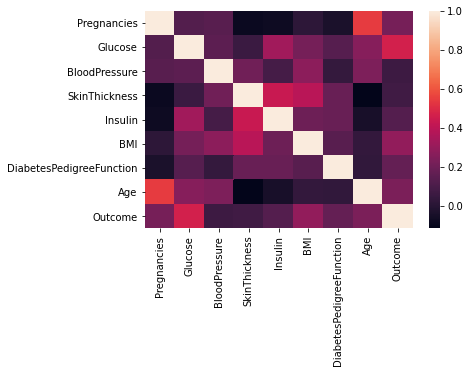

In [8]:
#Heat Map
sns.heatmap(data.corr())

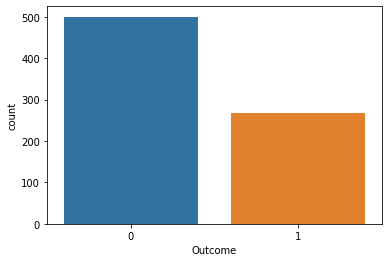

In [9]:
#Output Description
sns.countplot(x='Outcome',data=data)

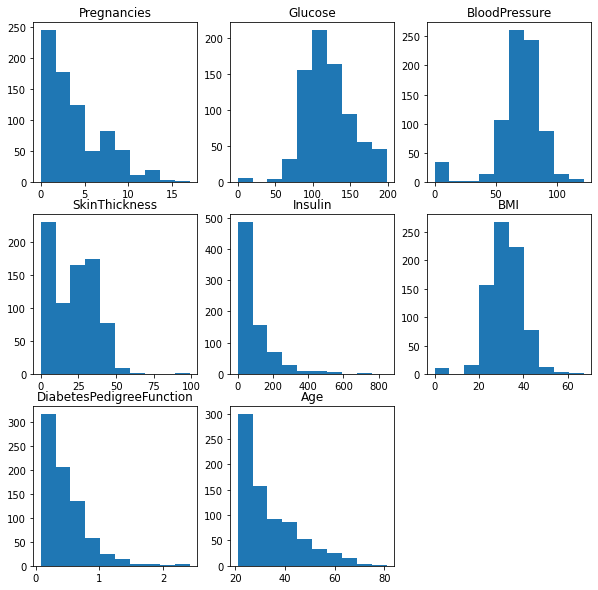

In [10]:
columns=data.columns # LIst of column name or Feature name

# Histogram of all features
plt.figure(figsize=(10,10))
for i in range(len(columns)-1):
  plt.subplot(3,3,i+1)
  plt.hist(data[columns[i]])
  plt.title(columns[i])

**Train,Test & Cross validation Dataset**

In [11]:
X=data.drop(['Outcome'],axis=1)
Y=data['Outcome']

In [12]:
#Train, Test Splitting
x_train,X_test,y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=44)

In [13]:
#Train and Cross Validation Splitting
X_train,X_val,Y_train,Y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=44)

**Classification Models**

**Logistic Regression**

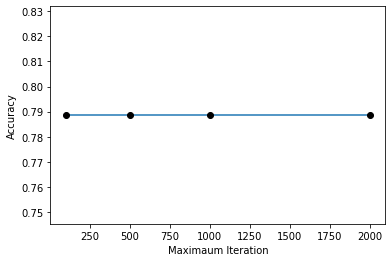

In [14]:
# Hyperparater (Maximum Iteration) Tunning
max_iteration=[100,500,1000,2000]
accuracy=[]
for max_itr in max_iteration:
  LR=LogisticRegression(max_iter=max_itr,random_state=44) 
  LR.fit(X_train,Y_train)  #Logistic Regression Fitting
  accuracy.append(accuracy_score(LR.predict(X_val),Y_val)) #Cross Validation Accuracy

#Cross Validation Accuracy Vs Max Iteration Plot
plt.plot(max_iteration,accuracy)
plt.plot(max_iteration,accuracy,'ko')
plt.xlabel('Maximaum Iteration')
plt.ylabel("Accuracy")
plt.show()


There is no change in Cross Validation accuracy w.r.t maximum iterations. So, we can use 100 iterations to save computational time

In [15]:
# Logistic Regression fitting using most ideal max iteration
Logistic_reg=LogisticRegression(max_iter=max_itr,random_state=44)
Logistic_reg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=44, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy on Test Data using Logistic Regression: 80.51948051948052 %

Confusion Matrix:
 [[88 28]
 [ 2 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.76      0.85       116
           1       0.56      0.95      0.71        38

    accuracy                           0.81       154
   macro avg       0.77      0.85      0.78       154
weighted avg       0.88      0.81      0.82       154



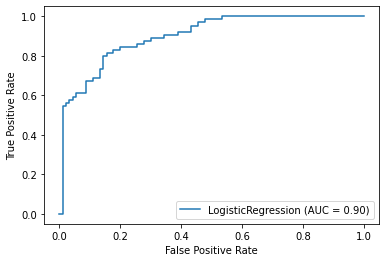

In [16]:
Model_Accuracy=[] #list to append accuracy of different Classification models

#Accuracy on Test Data using LR
test_acc=accuracy_score(Logistic_reg.predict(X_test),Y_test)
Model_Accuracy.append(test_acc*100) #Accuracy is appended to a list for comparison


print('Accuracy on Test Data using Logistic Regression:',(test_acc*100),'%')
print("\nConfusion Matrix:\n",confusion_matrix(Logistic_reg.predict(X_test),Y_test)) #Confusion Matrix
print("\nClassification Report:\n",classification_report(Logistic_reg.predict(X_test),Y_test)) #Classification Reprt
plot_roc_curve(Logistic_reg, X_test,Y_test) #ROC Curve
plt.show()

**KNN**

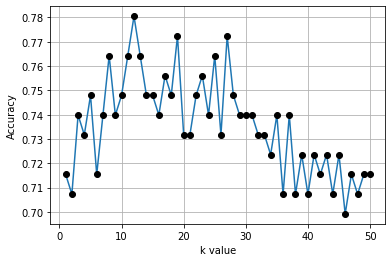

In [17]:
# Hyperparameter(K value) Tunning of KNN Model
acc=[]
K=np.arange(1,51,1)
for k in K:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,Y_train) #KNN Model Fitting
  acc.append(accuracy_score(knn.predict(X_val),Y_val)) #Cross validation Accuracy

#Cross Validation Accuracy VS K value Plot
plt.plot(K,acc)
plt.plot(K,acc,'ko')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

Highest Cross Validation Accuracy at K=12

Accuracy on Test Data using K nearest Neighbors: 72.72727272727273 %

Confusion Matrix:
 [[86 38]
 [ 4 26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.69      0.80       124
           1       0.41      0.87      0.55        30

    accuracy                           0.73       154
   macro avg       0.68      0.78      0.68       154
weighted avg       0.85      0.73      0.75       154



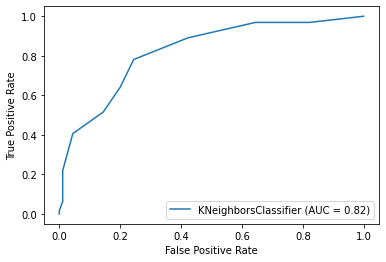

In [18]:
#KNN Model Fitting using most effective K value
KNN=KNeighborsClassifier(n_neighbors=12)
KNN.fit(X_train,Y_train)

#Accuracy on Test data using KNN Model
test_acc=accuracy_score(KNN.predict(X_test),Y_test)
Model_Accuracy.append(test_acc*100) #Accuracy is appended to a list for comparison

print('Accuracy on Test Data using K nearest Neighbors:',(test_acc*100),'%')
print("\nConfusion Matrix:\n",confusion_matrix(KNN.predict(X_test),Y_test)) #Confusion Matrix
print("\nClassification Report:\n",classification_report(KNN.predict(X_test),Y_test)) #Classification Report
plot_roc_curve(KNN, X_test,Y_test) #ROC Curve
plt.show()

**Decision Tree Classifier**

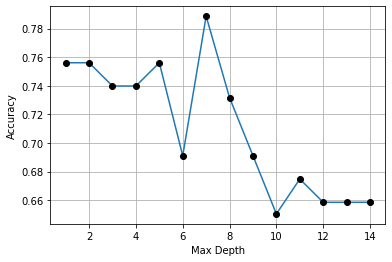

In [19]:
#Hyperparameter(Maximum depth the tree) Tunning of Decision Tree Classifier
max_depth=np.arange(1,15,1)
acc=[]
for d in max_depth:
  DT=DecisionTreeClassifier(max_depth=d,random_state=44)
  DT.fit(X_train,Y_train) #Model Fitting
  acc.append(accuracy_score(DT.predict(X_val),Y_val)) #Cross Validation Accuracy

#Cross Validation Accuracy Vs Depth of the tree Plot
plt.plot(max_depth,acc)
plt.plot(max_depth,acc,'ko')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

Highest cross validation accuracy at depth=7

Accuracy on Test Data using Decision Tree: 74.67532467532467 %

Confusion Matrix:
 [[74 23]
 [16 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79        97
           1       0.64      0.72      0.68        57

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



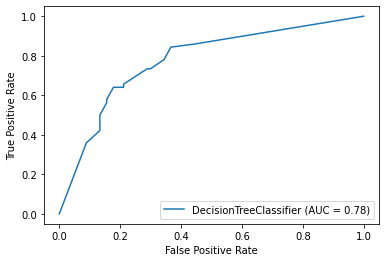

In [20]:
#Model Fitting using best thee depth
decision_tree_clf=DecisionTreeClassifier(max_depth=7,random_state=44)
decision_tree_clf.fit(X_train,Y_train)

#Accuracy on Test Data using Decision Tree
test_acc=accuracy_score(decision_tree_clf.predict(X_test),Y_test)
Model_Accuracy.append(test_acc*100) #Accuracy is appended to a list for comparison


print('Accuracy on Test Data using Decision Tree:',(test_acc*100),'%')
print("\nConfusion Matrix:\n",confusion_matrix(decision_tree_clf.predict(X_test),Y_test)) #Confusion Matrix
print("\nClassification Report:\n",classification_report(decision_tree_clf.predict(X_test),Y_test)) #Classification Report
plot_roc_curve(decision_tree_clf, X_test,Y_test) #ROC Curve
plt.show()

**Random Forest Classifier**

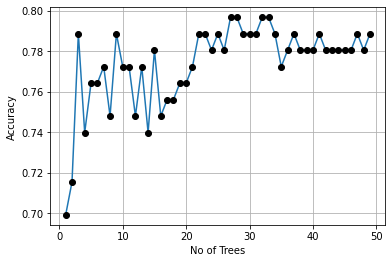

In [21]:
# Hyperparameter(Maximum no of trees / N estimators) Tunning of Random Forest Classifier
acc=[]
N_est=np.arange(1,50,1) #Max no of trees
for n in N_est:
  RF=RandomForestClassifier(n_estimators=n,random_state=44)
  RF.fit(X_train,Y_train) #Model Fitting
  acc.append(accuracy_score(RF.predict(X_val),Y_val)) #Cross Validation Accuracy

#Cross Validation Accuracy Vs Max no of Trees Plot
plt.plot(N_est,acc)
plt.plot(N_est,acc,'ko')
plt.xlabel('No of Trees')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

Highest cross validation accuracy at trees of the Random Forest Classifier=27

Accuracy on Test Data using Random Forest: 79.22077922077922 %

Confusion Matrix:
 [[85 27]
 [ 5 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.76      0.84       112
           1       0.58      0.88      0.70        42

    accuracy                           0.79       154
   macro avg       0.76      0.82      0.77       154
weighted avg       0.84      0.79      0.80       154



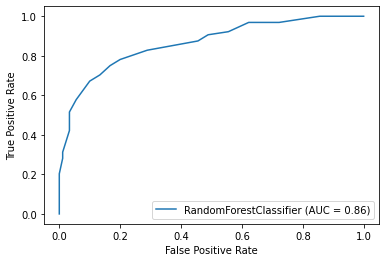

In [22]:
# Modell Fitting using most effective no of trees 
RF_clf=RandomForestClassifier(n_estimators=27,random_state=44)
RF_clf.fit(X_train,Y_train)

#Accuracy on Test data
test_acc=accuracy_score(RF_clf.predict(X_test),Y_test)
Model_Accuracy.append(test_acc*100) #Accuracy is appended to a list for comparison

print('Accuracy on Test Data using Random Forest:',(test_acc*100),'%')
print("\nConfusion Matrix:\n",confusion_matrix(RF_clf.predict(X_test),Y_test)) #Confusion Matrix
print("\nClassification Report:\n",classification_report(RF_clf.predict(X_test),Y_test)) #Classification Report
plot_roc_curve(RF_clf, X_test,Y_test) #ROC Curve
plt.show()

**Support Vector Classifier**

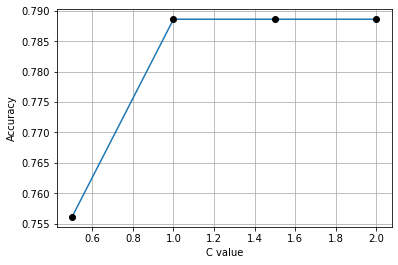

In [23]:
# Hyperparameter Tunning
C=np.arange(0.5,2.1,0.5)
acc=[]

for c in C:
  SVM=SVC(C=c,random_state=44)
  SVM.fit(X_train,Y_train) #Model Fitting
  acc.append(accuracy_score(SVM.predict(X_val),Y_val)) #Cross Validation Accuracy

#Cross Validation Accuracy Vs C value Plot
plt.plot(C,acc)
plt.plot(C,acc,'ko')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

At C=1.0, cross validation accuracy is the highest

Accuracy on Test Data using Random Forest: 74.02597402597402 %

Confusion Matrix:
 [[87 37]
 [ 3 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.70      0.81       124
           1       0.42      0.90      0.57        30

    accuracy                           0.74       154
   macro avg       0.69      0.80      0.69       154
weighted avg       0.86      0.74      0.77       154



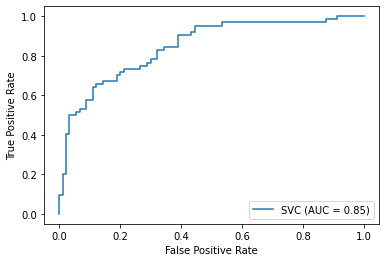

In [24]:
#Model Fitting using most effective C value
SVM=SVC(C=1.0,random_state=44)
SVM.fit(X_train,Y_train)

#Accuracy on Test Data
test_acc=accuracy_score(SVM.predict(X_test),Y_test)
Model_Accuracy.append(test_acc*100) #Accuracy is appended to a list for comparison

print('Accuracy on Test Data using Random Forest:',(test_acc*100),'%')
print("\nConfusion Matrix:\n",confusion_matrix(SVM.predict(X_test),Y_test)) #Confusion Matrix
print("\nClassification Report:\n",classification_report(SVM.predict(X_test),Y_test)) #Classification Matrix
plot_roc_curve(SVM, X_test,Y_test) #ROC Curve
plt.show()

**Comparison of Accuracy on Test Data**

In [25]:
print('Accuracy using Logitic Regression:',Model_Accuracy[0],'%')
print('Accuracy using K-Nearest Neighbor:',Model_Accuracy[1],'%')
print('Accuracy using Decision Tree Classifier:',Model_Accuracy[2],'%')
print('Accuracy using Random Forest Classifier:',Model_Accuracy[3],'%')
print('Accuracy using Support Vector Classifier:',Model_Accuracy[4],'%')

Accuracy using Logitic Regression: 80.51948051948052 %
Accuracy using K-Nearest Neighbor: 72.72727272727273 %
Accuracy using Decision Tree Classifier: 74.67532467532467 %
Accuracy using Random Forest Classifier: 79.22077922077922 %
Accuracy using Support Vector Classifier: 74.02597402597402 %


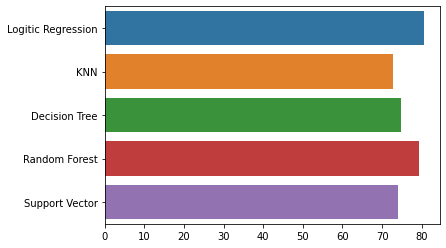

In [26]:
#Bar Plot
clf=['Logitic Regression','KNN','Decision Tree','Random Forest','Support Vector']
Acc=[Model_Accuracy[0],Model_Accuracy[1],Model_Accuracy[2],Model_Accuracy[3],Model_Accuracy[4]]
sns.barplot(x=Acc,y=clf)
plt.show()

**Among these 5 classification moldels, Logistic Regression performed the best with accuracy 80.52% on test data set and Random Forest is just behind Logistic Regression with accuracy 79.22%**